# linear model

##  Regression
The goal of regression is to predict the value of one or more continuous target variables y given the value of a D-dimensional vector x of input variables. Linear Regression is one of the simplest models there is. We will discuss two very different ways to train it:
   1. Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).
   2. Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of Gradient Descent that we will use again and again when we study neural networks.
     
Next we will look at Polynomial Regression, a more complex model that can fit nonlinear datasets. this model will give us a direct vue on the problem of overfiting (we will see the absract of this concept in later lectures)so we will look at how to detect whether or not this is the case, using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set.
Finaly we will do a classification problem and a regression problem from the ground up. 

### Disclaimer 
There will be quite a few math equations in this chapter, using basic notions of linear algebra and calculus. To understand these equations, you will need to know what vectors and matrices are, how to transpose them, what the dot product is, what matrix inverse is, and what partial derivatives are. For those who are truly allergic to mathematics, you should still go through this chapter and simply skip the equations; hopefully, the text will be sufficient to help you understand most of the concepts.

# Linear Regression
Linear regression is another useful linear model that applies to real valued target functions It has a long history in statistics, where it has been studied in great detail, and has various applications in social and behavioral sciences. Here, we discuss linear regression from a learning perspective, where we derive the main results with minimal assumptions.
A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)
\begin{equation}
\hat{y} = w_0 +w_1 x_1 + \dots + w_n x_n
\end{equation}
1. $w_i $ $i={1,\dots,n}$ the free parametrers
2. $w_0$ the bias term
3. $x_i $ $i={1,\dots,n}$ the features 
4. $\hat{y}$ is the prediction made by the model

This can be written much more concisely using a vectorized form
\begin{equation}
\hat{y} = h_w (x) = w^T x
\end{equation}
Where 
1. $x=(1,x_1,x_2,\dots,x_n)^T$ features vector (all the features padded with one)
2. $w=(w_0,w_1,w_2,\dots,w_n)^T$ the weight vector (free parametres + bias )
3. $h_w$ the hypothesis function

## Training The model
Well, recall that training a model means setting its parameters so that the model best fits the training
set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. we declared in previous lectures thats the role of the learning algorithm, however we need a performance mesure, the most common performance measure of a regression model is the Mean Square Error (MSE) 
The MSE of a Linear Regression hypothesis $h_w$ using the training set $\{ \hspace{10px}\{ x_k \hspace{10px} k=1,\dots,n \}_i \hspace{10px} | \hspace{10px}i=1,\dots,m \} = \{ x^{(i)} \hspace{10px} i=1,...,m \} = X $ is :
\begin{equation}
J_w (X) = \frac{1}{m} \sum _{i=1}^{i=m} (W^T x^{(i)} - y^{(i)})^2
\end{equation}

### The Normal Equation
To find the value of w that minimizes the cost function, there is a closed-form solution in other words, a mathematical equation that gives the result directly. This is called the Normal Equation
\begin{equation}
\hat{w}=(X^T X)^{-1} X^T y
\end{equation}
Let's generate some synthetic data to test this equation on

In [1]:
import numpy as np
import matplotlib.pyplot as plt

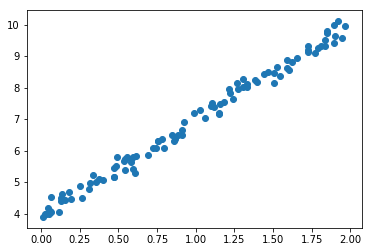

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)*0.2
plt.scatter(X,y)
plt.show()

In [86]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
w= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w)

[[ 4.01736502]
 [ 2.94187608]]


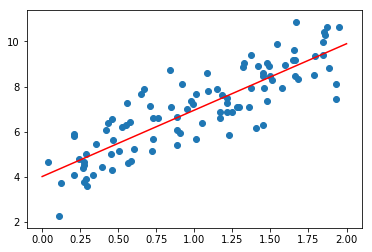

In [87]:
X_new=np.linspace(0,2,100)
X_new_b=np.c_[np.ones((100,1)),X_new]
y_predict=np.dot(X_new_b,w)
plt.plot(X_new,y_predict,'r')
plt.scatter(X,y)
plt.show()

#### Now we will Use scikit Learn 

In [2]:
from sklearn.linear_model import LinearRegression

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 3.74743101] [[ 3.19080501]]


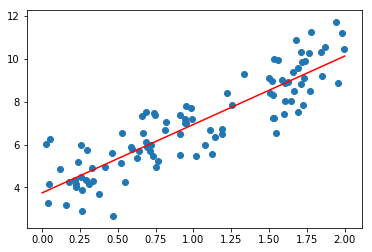

In [57]:
y_pred_scikit=lin_reg.predict(X_new.reshape(-1,1))
plt.plot(X_new,y_pred_scikit,'r')
plt.scatter(X,y)
plt.show()

### Computational Complexity
The Normal Equation computes the inverse of $X^T X$, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^2.4 )$ to $O(n^3 )$ (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly $2^2.4 = 5.3$ to $2^3 = 8$. i.e. The Normal Equation gets very slow when the number of features grows large (e.g., 100,000).

## Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function (MSE). suppose it rains on a mountain the easiest way water flows is by following the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector $w$ and it goes in the direction of descending gradient. Once the gradient is zero.

Concretely, you start by filling $w$ with random values (this is called random initializa‐tion), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

<img src="step.png">

# Polynomial Regression
you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple
quadratic equation



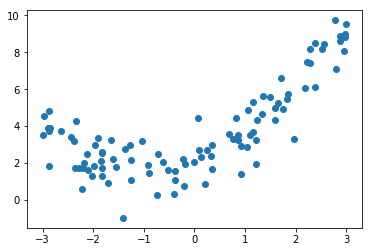

In [60]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)
plt.show()

A straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square of each feature in the training set as new features (in this case there is just one feature):

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('shape of X ->',X.shape,'  1st row ->', X[0])
print('shape of X_poly ->',X_poly.shape,'  1st row ->', X_poly[0])

shape of X -> (100, 1)   1st row -> [ 2.3714408]
shape of X_poly -> (100, 2)   1st row -> [ 2.3714408   5.62373149]


In [80]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 2.09814352] [[ 0.93901941  0.49991605]]


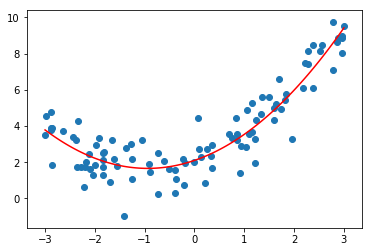

In [81]:
X_new=np.linspace(-3,3,100).reshape(-1,1)
X_new_poly=poly_features.fit_transform(X_new)
y_pred_scikit=lin_reg.predict(X_new_poly)
plt.plot(X_new,y_pred_scikit,'r')
plt.scatter(X,y)
plt.show()

# Real Example Quandl

In [4]:
import pandas as pd
#import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2

In [39]:
df=quandl.get('WIKI/GOOGL')
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume'] ]
df.dropna(inplace=True)
x=np.array(df.drop(['Adj. Close'],1),np.float64)
x=preprocessing.scale(x)
y=np.array(df['Adj. Close'])

## Spliting the data into test and training 

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2)
print('Training data input size',x_train.shape,'Training data True output size',y_train.shape)
print('Testing data input size',x_test.shape,'Testing data True output size',y_test.shape)

Training data input size (2680, 4) Training data True output size (2680,)
Testing data input size (671, 4) Testing data True output size (671,)


## Trainig The Model And calculating the Accuracy

Training Accuracy 0.999910287009


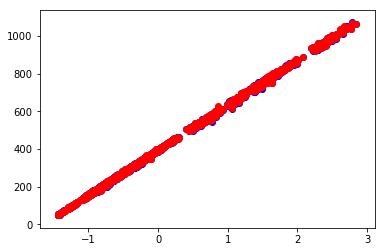

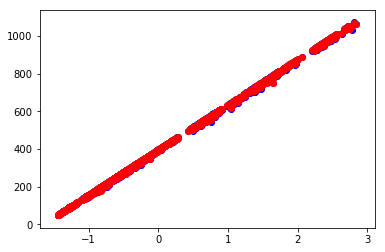

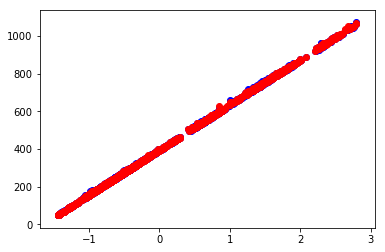

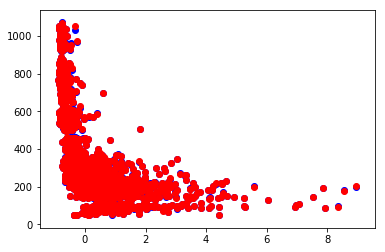

In [42]:
clf=LinearRegression()
clf.fit(x_train,y_train)
Accuracy_train=clf.score(x_train,y_train)
print('Training Accuracy',Accuracy_train)
y_pred_train=clf.predict(x_train)
for i in range(4):
    plt.scatter(x_train[:,i],y_train,color='b')
    plt.scatter(x_train[:,i],y_pred_train,color='red')
    plt.show()

## Testing The Model

testing Accuracy 0.99989531434


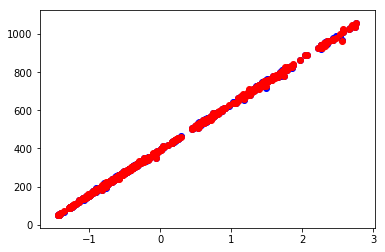

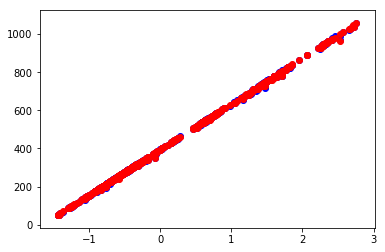

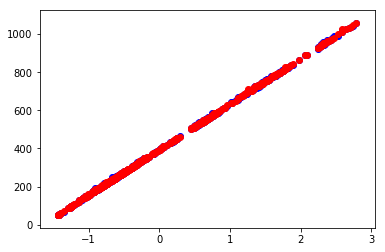

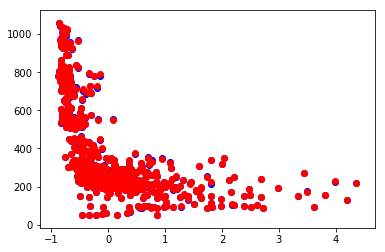

In [43]:
Accuracy_test=clf.score(x_test,y_test)
print('testing Accuracy',Accuracy_test)
y_pred_test=clf.predict(x_test)
for i in range(4):
    plt.scatter(x_test[:,i],y_test,color='b')
    plt.scatter(x_test[:,i],y_pred_test,color='red')
    plt.show()

# Classification Model

## Logistic Regression

Logistic Regression (also called Logit Regression) is com‐ monly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this client will like a product). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

##  Logistic Regression model estimated probability (vectorized form)


\begin{equation}
\hat{p}=h_w (x) = \sigma (w^T x)
\end{equation}

The logistic—also called the logit, noted $\sigma $—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.
Once the Logistic Regression model has estimated the probability $\hat{p}$ that an instance x belongs to the positive class, it can make its prediction $\hat{y}$ easily.

### Logistic Regression model prediction

<img src="splitter.png"> 

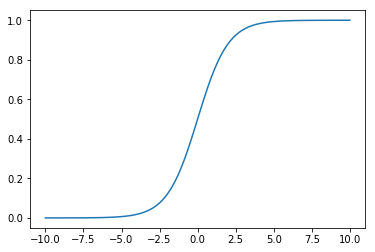

In [45]:
x=np.linspace(-10,10,100)
sigma=1/(1+np.exp(-x))
plt.plot(x,sigma)
plt.show()

## Training and Cost Function

Good, now you know how a Logistic Regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector $w$ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

### Cost function of a single training instance
<img src="splitter0.png"> 
This cost function makes sense because – log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression, called the log loss.

### Logistic Regression cost function (log loss)

<img src="splitter1.png"> 



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# The Iris DataSet


<img src='rrr.jpg'>

In [11]:
iris = datasets.load_iris()
print(iris["data"][:10,:],iris["feature_names"][:])
X = iris["data"][:,:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
y=y.reshape(-1,1)
print(iris["target"][:150][:])
print(y)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


# Training The Model Using Scikit-Learn

/home/salmita/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


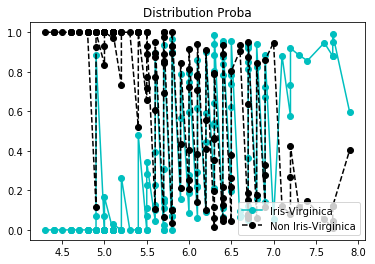

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_proba = log_reg.predict_proba(X)
XXl1, y_proba1 = zip(*sorted(zip(X[:,0], y_proba[:, 1])))
XXl2, y_proba2 = zip(*sorted(zip(X[:,0], y_proba[:, 0])))
plt.plot(XXl1, y_proba1, "co-", label="Iris-Virginica")
plt.plot(XXl2, y_proba2, "ko--", label="Non Iris-Virginica")
plt.title('Distribution Proba')
plt.legend(loc=4)
plt.show()

# Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers This is called Softmax Regression, or Multinomial Logistic Regression.
The idea is quite simple: when given an instance $x$ the Softmax Regression model first computes a score $s_k (x) $ for each class $k$ then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k (x) $
## Softmax score for class k
\begin{equation}
s_k (x) =w^{T}_{k} x
\end{equation}

Note that each class has its own dedicated parameter vector $w_k$ . All these vectors are typically stored as rows in a parameter matrix $W$.

## Softmax function

<img src="splitter2.png"> 
1. $K$ number of classes
2. $s(x)$ is a vector containing the scores of each class for the instance $x$
3. $\sigma (s (x) )_k$ is the estimated probability that the instance $x$  belongs to class $k$ given the scores of each class for that instance.

##  Softmax Regression classifier prediction
<img src="splitter3.png"> 
The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

## Training Model ,Cost Function : Cross entropy
<img src="splitter4.png"> 
where :
1. $y_{k}^{(i)}$ is equal to 1 if the target class for the $i^{th}$  instance is $k$; otherwise, it is equal to 0.
Notice that when there are just two classes (K = 2), this cost function is equivalent to
the Logistic Regression’s cost function
Let's Start by loading The Data

In [14]:
from sklearn.metrics import accuracy_score as ac
iris = datasets.load_iris()
d1=iris["data"]
X = iris["data"][:,:] 
y = iris["target"]
Xt,Xl,yt,yl=train_test_split(X, y, test_size=0.2)

## Training The model

In [17]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(Xt, yt)
y_proba_train=softmax_reg.predict_proba(Xt)
y_pred_train=np.argmax(y_proba_train,axis=1)
Accuracy_train=ac(yt,y_pred_train)
print('Accuracy Training ->',Accuracy_train)
print(y_proba_train)

Accuracy Training -> 0.975
[[  9.95674764e-01   4.32523569e-03   5.07955599e-14]
 [  9.94738026e-01   5.26197373e-03   2.44952484e-14]
 [  5.96195959e-04   9.39450285e-01   5.99535191e-02]
 [  9.98038350e-01   1.96165040e-03   6.54998642e-14]
 [  9.93263647e-01   6.73635319e-03   1.98730747e-13]
 [  1.43674613e-02   9.85052758e-01   5.79780633e-04]
 [  9.96542847e-01   3.45715308e-03   2.34235613e-14]
 [  9.95267229e-01   4.73277099e-03   3.38020687e-14]
 [  2.95917095e-06   7.07601666e-02   9.29236874e-01]
 [  2.82502756e-03   9.94397170e-01   2.77780269e-03]
 [  5.73779900e-09   5.04763631e-04   9.99495231e-01]
 [  9.98496431e-01   1.50356907e-03   6.73786525e-15]
 [  4.54153989e-04   9.92626468e-01   6.91937765e-03]
 [  3.55325258e-07   6.39458659e-03   9.93605058e-01]
 [  1.11676276e-08   1.03884576e-03   9.98961143e-01]
 [  1.28408701e-08   2.04687845e-03   9.97953109e-01]
 [  7.12827878e-03   9.92551891e-01   3.19830626e-04]
 [  9.98290501e-01   1.70949852e-03   5.85782239e-16]
 

In [58]:
y_proba = softmax_reg.predict_proba(Xl)
y_pred=np.argmax(y_proba,axis=1)
Accuracy_test=ac(yl,y_pred)
print('Accuracy Testing ->',Accuracy_test)

Accuracy Testing -> 0.966666666667
